### 問題：問題：我是一個資料分析師，我想要根據一個人的年齡與薪水，判斷是否會買這個產品
- [資料集](https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads)

# Environment

In [1]:
# HappyML install
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [2]:
# Load data
datasetName="Social_Network_Ads.csv"
datasetName = datasetName.replace(" ", "%20")
if not os.path.isfile(datasetName):
  os.system("wget https://raw.githubusercontent.com/StanOWO/1131_NTUAI_ML_Resource/main/dataset/" + datasetName)

# Preprocessing

In [3]:
import HappyML.preprocessor as pp

In [4]:
# Read CSV file
dataset = pp.dataset(file="Social_Network_Ads.csv")

In [5]:
# Decomposition the dataset into Independent & Dependent Variables
X, Y = pp.decomposition(dataset, x_columns=[0,1], y_columns=[2])

In [6]:
# Split Training & Testing set
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8, random_state=0)

In [7]:
# Feature Scaling
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

# Model(Logistic Regression)

In [8]:
from HappyML.regression import LogisticRegressor
model = LogisticRegressor()
Y_pred = model.fit(X_train, Y_train).predict(X_test)

# Performance

In [9]:
from HappyML.performance import ClassificationPerformance

pfm = ClassificationPerformance(Y_test, Y_pred)
print("Confusion Matrix:\n", pfm.confusion_matrix())
print(f"Accuracy: {pfm.accuracy():.2%}")
print(f"Recall: {pfm.recall():.2%}")
print(f"Precision: {pfm.precision():.2%}")

Confusion Matrix:
 [[57  1]
 [ 5 17]]
Accuracy: 92.50%
Recall: 87.77%
Precision: 93.19%


# Visualization

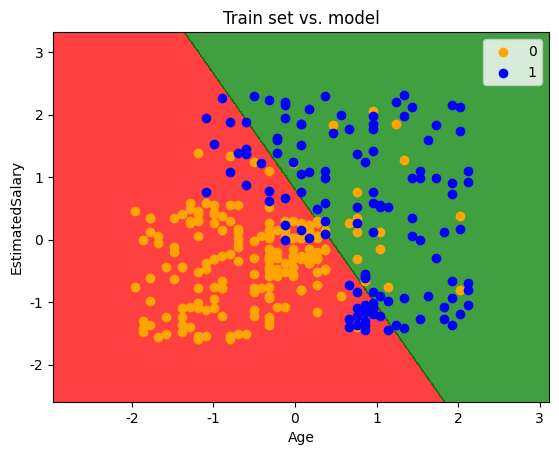

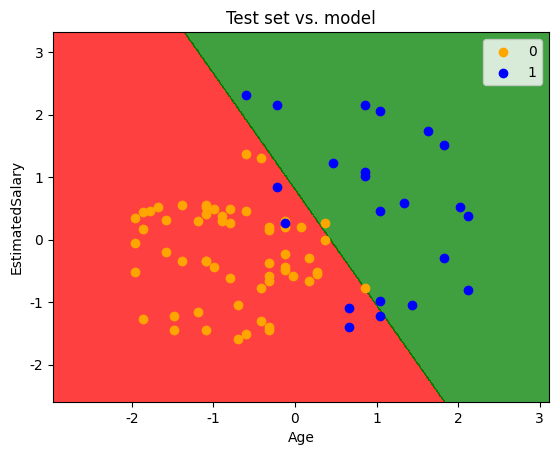

In [10]:
import HappyML.model_drawer as md

md.classify_result(x=X_train, y=Y_train, classifier=model.regressor,
                   title="Train set vs. model", font="DejaVu Sans")
md.classify_result(x=X_test, y=Y_test, classifier=model.regressor,
                   title="Test set vs. model", font="DejaVu Sans")